# try

In [1]:
#packages
import pandas as pd
#import seaborn as sns
import numpy as np
import tellurium as te
from tellurium import ParameterScan
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

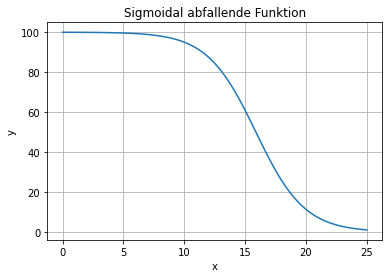

49.90659700515018

In [2]:
#EPO production

def sigmoidal_function(x):
    a =  99.81319401  # maximal y-achse 1000#
    b =  0.5    # Anpassen der Steigung  1 
    c = 15.881 # 12.334914378205907 #15.881 # , x-Wert bei dem y = 0.5*ymax  (= )
    
    y = a / (1 + np.exp(b * (x-c)))  # Sigmoidal abfallende Funktion

    return y

# Erstellen der x- und y-Daten
x = np.linspace(0,25 , 100)
y = sigmoidal_function(x)

# Erstellen des Plots15.881
plt.plot(x, y)
plt.title('Sigmoidal abfallende Funktion')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


#99.81319401 / (1 + np.exp(0.5 * (15.281321478378196-15.281321478378196))) 

1000 / (1 + np.exp(1 * (15.281321478378196-12.334914378205907))) 

In [3]:
k_R_death = 0.001

R0 = 46696.30405453991
Hkt = 0.45
param1_TRPaging= 3.53276388
param2_TRPaging=-5.99745537
param3_TRPaging= 0.29658879
t_R_aging = param1_TRPaging/ (1+np.exp(-param2_TRPaging*(Hkt - param3_TRPaging)))
k_R_aging = np.log(2) / (t_R_aging/2)
t_P_aging = 11-(param1_TRPaging/ (1+np.exp(-param2_TRPaging*(Hkt - param3_TRPaging))))
k_P_aging= np.log(2) / (t_P_aging/2)   

P1= (R0 * k_R_death + R0 * k_R_aging) / (k_P_aging * 2**10)


#OIE.J_R_death, R0 * k_R_death
#OIE.J_R_aging, R0 * k_R_aging

#OIE.J_R_death + OIE.J_R_aging 




In [4]:
OIE_model = """
#species initiation
##erythropoisis
EPO = 15       #in mU/mL , (Thi,2010) erreicht nach (El Hassan 1997)max. 1000 mU/mL (miliunits)
P   = 453.3712612598663    
R   = 46391.75257731959   #für SS berechnet
E   = 5567010.30927835      #cells, bezieht sich auf gesamtvolumen 1 mikroliter
niE = 0        #model schmeme

##parasite lifecircle 
M   = 1e3      #Merozoiten,(Austin, 1997) pro mikroliter (10^6 cells/ml => 10^3 cells/mikroliter)
iE  = 0        #in cells/(kg body weight*10^11)
##Artesunate treatment
ART = 0
diE = 0
oiE = 0        #once-infected Erys
##LDH, weiteres
LDH = 180      # U/l
A   = 0        #Antikörper
I   = 0        #Immun cells, bei Infektion 10^-2

#Reactions 
##erythropoisis
EPOprod:       -> EPO   ; J_EPO_prod             
EPOdecay:  EPO ->       ; J_EPO_decay
Pbirth:        -> P     ; J_P_birth
Pdeath:      P ->       ; J_P_death
Page:        P -> 1024R ; J_P_aging     # Vorläufer teilen sich ca. 10x -> 2**10
Rdeath:      R ->       ; J_R_death 
Raging:      R -> E     ; J_R_aging        
Edeath:      E ->       ; J_E_death       
##parasite lifecircle 
infect:    E+M -> iE    ; J_E_infect     
iEdeath:    iE ->       ; J_iE_death     
iErupture:  iE -> 16M   ; J_iE_rupture  #Tumwiine (2008)
Mdeath:      M ->       ; J_M_death
##Artesunate treatment
ARTdeath:  ART ->       ; J_ART_decay
iE_treat:   iE -> diE   ; J_iE_kill     
diEpitt:   diE -> oiE   ; J_diE_pitt 
diEdeath:  diE ->       ; J_diE_death 
oiEdeath:  oiE ->       ; J_oiE_death
##LDH, haptoglobin
LDHrelease:    -> LDH   ; J_LDH_release   
LDHdecay:  LDH ->       ; J_LDH_decay 

#parameter
#Lebenszeiten t
##Erythropoese
t_P_aging   := 5 * Hkt + 7.75          #in days, Entwicklung von Stammzelle zum Retikulozyt dauert ca. 5-9 Tage, plus 3 Tage die er schon retikulozyte ist aber noch in Rückenmark
t_R_aging   :=-5 * Hkt + 3.25          #in days, Entwicklung R -> E dauert ca 4 Tage (3 tage knochenmark, 1 Tage im peripheren Blut)-> wir betrachten nur Retis in peripheren Blut, bei niedrigen Hkt verlassen Retis eher Knochenmark,  reifen länger im Blut
t_E_death    = 120       #in 1/days, 120 Tage E Lebensdauer s. Jorins Quellen
##Infection with parasite
t_iE_rupture = 4          #in days, dauert ca 4 Tage bis Ruptur, sinuskurvig (2010 Th)
##Artesunate treatment
t_halb_ART_decay = 1/12  #Halbwertszeit von 2h -> verlässliche quelle noch suchen
t_diE_pitt  = 0.8       #in days, bei Medikamentengabe nach 8h Maximum an gepitteten RBCs
t_oiE_death = 10         #in days, Lebenspanne von 7-14 Tage(Fanello,2017), 7-21 (Arguin 2014) -> dort Verweise nachgehen
##LDH
t_halb_LDH_decay = 4            #(3-5 Tage), https://www.medicoconsult.de/ldh/



#random Zahlen
KI_P_death = 15          #EPO Wert bei gesunden Menschen
##Parameter für EPO- GG
b = 100
c = 0.04
d = -log(0.5)/P
a = EPO * (1-exp(-d*P))*(1+exp((Hb-b)*c))
##Parameter für iE_kill, alles random zahlen müssen gefittet werden. egsc
e= 100    #y-Achse Streckung, maxima von k festlegen 
f= 0.05  #x-Achse Stauchung
g= 0.01  #Verschiebung y-Achse

#Assignments
##Erythropoese
J_EPO_prod  := k_EPO_prod         # hier später Abhängigkeit von, oiE, diE, iE einfügen (Ma, 2019) vlt (Hassan 2009)
J_EPO_decay := EPO* k_EPO_decay
J_P_birth    = k_P_birth   
J_P_death   := P * k_P_death
J_P_aging   := P * k_P_aging
J_R_death   := R * k_R_death
J_R_aging   := R * k_R_aging
J_E_death   := E * k_E_death
##Infection with parasite
J_E_infect  := E*M* k_E_infect       # einbezug parasit?, E ersmal als Abhängigkeit ausgelassen da am Anfang E >> M -> mit Jorin absprechen+
J_iE_death  := iE * k_iE_death       #einbezug antibodies, spleen
J_iE_rupture:= iE * k_iE_rupture     #16-32M s.Cowman 2016, Anderson 1989, Diebner 2000
J_M_death   := M  * k_M_death
##Artesunate treatment
J_ART_decay := ART * k_ART_decay
J_iE_kill   := iE  * k_iE_kill       #einbezug artesunat
J_diE_pitt  := diE * k_diE_pitt     #spleen
J_diE_death := diE * k_diE_death
J_oiE_death := oiE * k_oiE_death
##LDH
J_LDH_release := (LDH_conc_E/ Vol_blood)* (J_E_death*Vol_E + J_iE_death*Vol_E + J_iE_rupture*Vol_E + J_R_death*Vol_R) 
J_LDH_decay   := LDH * k_LDH_decay

#Rates
##Erythropoese
k_EPO_prod := a/(1+exp((Hb-b)*c) )      # in #cell/day
k_EPO_decay:= 1-exp(-P*d)               # in 1/days, (Ma, 2009)
k_P_birth   = P * (k_P_death + k_P_aging)
k_P_death  := 1/(1+ (EPO/KI_P_death))     #geraten, muss hoch sein, da wenn EPO da ist, dese so stark verringert wird dass Erythropoese verstärkt wird 
k_P_aging  := ln(2) / (t_P_aging/2)       #in 1/days
k_R_death   = 0.001                       #in 1/days,  geraten
k_R_aging  := ln(2) / (t_R_aging/2)       #in 1/days 
k_E_death  := ln(2) / (t_E_death/2)       #in 1/days       #verkürzung bei Infektion: k_E_alter; 0.15aus komischen paper 2022
##infection with parasit                       
k_E_infect  = 2e-6                      #in 1/mikroliter*day ((Austin, 1997)
k_iE_death  = 0                         #in 1/days, vereinfacht in Austin(1998)  (0.025  Ma 2019)
k_iE_rupture= 1                         #ln(2) / (t_iE_rupture/2)    #in 1/days, Austin(1998)
k_M_death   = 48                        #48 in 1/days 2010 Thi (48)
##Artesunate treatment
k_ART_decay = ln(2) / t_halb_ART_decay  #ART hat 1h Halbwertszeit (Tilley 2016), andere Quellen 2h 
k_iE_kill  := e*(1-exp(-ART*f))+ g      #geraten       #0.01  geschätzt ohne Medikament (Tilley?)
k_diE_pitt  = 1                         #geraten       #bei Medikamentengabe nach 8h Maximum an gepitteten RBCs
k_diE_death = 0                         #geraten
k_oiE_death = ln(2) / (t_oiE_death/2)           #in 1/days               
##LDH, haptoglobin
k_LDH_decay  = ln(2) / t_halb_LDH_decay

#Messwerte
##Hämoglobin(noch diE, niE Volumen, iE, Konzentrationen hinzufügen)
###Volumen
Vol_R    = 100e-15        #in l, Jorin
Vol_E    = 80e-15         #=80 fL, in l, Jorin, =MCH
Vol_iE   = 80e-15         #in l,   Jorin
#Vol_diE = 80e-15         #auf gleiches Volumen wie iE geschätzt
Vol_oiE  = 50e-15         #in l, Jorin
Vol_blood= 1e-6           # =1µl, in l, gesamtes Blutvolumen 
###Hb Konzentrationen
Hb_conc_R    = 300        #in g/l (Piva,2014) 
Hb_conc_E    = 340        #in g/l,  =MCHC, https://www.ucsfhealth.org/medical-tests/rbc-indices    
Hb_conc_iE   = 177        #in g/l  (Hanssen,2012)
#Hb_conc_diE =
#Hb_conc_oiE = 
##Hämatokrit, Hämoglobinhttps://www.labopart.de/einsender/formelberechnungen/rpi/
Hkt      := (Vol_E * E + Vol_R * R + Vol_iE * iE) / Vol_blood                             #0.4 ~ 40 %, #hier fehlen noch MCHC von infected Zellen https://www.charite.de/fileadmin/user_upload/microsites/m_cc05/ilp/referenzdb/30451.htm    https://www.labor-und-diagnose-2020.de/k15.html
Hb       := (Vol_E * E * Hb_conc_E + Vol_R * R * Hb_conc_R +  Vol_iE * iE * Hb_conc_iE ) / Vol_blood     #in g/l      https://www.charite.de/fileadmin/user_upload/microsites/m_cc05/ilp/referenzdb/30459.htm
Hb_g_dl  := Hb/10
##LDH & Haptoglobin
LDH_conc_E =  6062.500000000001  #U/l                    #https://www.ncbi.nlm.nih.gov/books/NBK557536/?report=printable
#Parasitemie
p := iE / (E + R + iE + oiE + diE)  
#RPI
R_percent := 100* R/(R+E)
shift     := -5 * Hkt + 3.25  # in days
RPI       := R_percent * Hkt/ (shift * 0.45) 


#Events
## ART ZUgabe, 3x im Abstand von 3h Zugabe von 40mg DHA= Dihydroartemisinin
#t_ART_add = 5
#E1: at(time>=t_ART_add): ART = 40;
#E2: at(time>=t_ART_add+ 0.125): ART = ART+40;
#E3: at(time>=t_ART_add +0.25) : ART = ART+40;   
"""

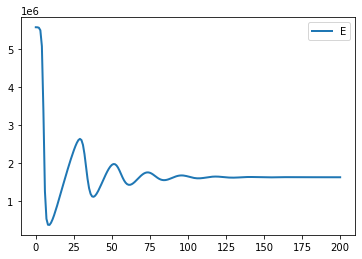

8.579359894366538 2.420640105633461 0.16587197887330773


In [5]:
OIE = te.loada(OIE_model)
result = OIE.simulate (0, 200, 201, ['time',  'E'])
OIE.plot(result)

print(OIE.t_P_aging,OIE.t_R_aging, OIE.Hkt)

In [6]:
model = """#species initiation
##erythropoisis
EPO = 15       #in mU/mL , (Thi,2010) erreicht nach (El Hassan 1997)max. 1000 mU/mL (miliunits)
P   = 453.04169624571756 # 453.3712612598663    
R   = 46696.30405453991  # 46391.75257731959   #für SS berechnet
E   = 5566629.619931825  # 5567010.30927835      #cells, bezieht sich auf gesamtvolumen 1 mikroliter

##parasite lifecircle 
M   = 40e3      #Merozoiten,(Austin, 1997) pro mikroliter (10^6 cells/ml => 10^3 cells/mikroliter)
iE  = 0        #in cells/(kg body weight*10^11)
##Artesunate treatment
ART = 0
diE = 0
oiE = 0        #once-infected Erys
##LDH, weiteres
LDH = 180      # U/l

#Reactions 
##erythropoisis
EPOprod:       -> EPO   ; J_EPO_prod             
EPOdecay:  EPO ->       ; J_EPO_decay
Pbirth:        -> P     ; J_P_birth
Pdeath:      P ->       ; J_P_death
Page:        P -> 1024R ; J_P_aging     # Vorläufer teilen sich ca. 10x -> 2**10
Rdeath:      R ->       ; J_R_death 
Raging:      R -> E     ; J_R_aging        
Edeath:      E ->       ; J_E_death       
##parasite lifecircle 
infect:    E+M -> iE    ; J_E_infect     
iEdeath:    iE ->       ; 0 #J_iE_death     
iErupture:  iE -> 16M   ; J_iE_rupture  #Tumwiine (2008)
Mdeath:      M ->       ; J_M_death
##Artesunate treatment
ARTdeath:  ART ->       ; J_ART_decay
iE_treat:   iE -> diE   ; J_iE_kill     
diEpitt:   diE -> oiE   ; J_diE_pitt 
diEdeath:  diE ->       ; J_diE_death 
oiEdeath:  oiE ->       ; J_oiE_death 
##LDH, haptoglobin
LDHrelease:    -> LDH   ; J_LDH_release   
LDHdecay:  LDH ->       ; J_LDH_decay 

#Assignments, Fluxes
##Erythropoese
J_EPO_prod  := k_EPO_prod           # hier später Abhängigkeit von, oiE, diE, iE einfügen (Ma, 2019) vlt (Hassan 2009)
J_EPO_decay := EPO* k_EPO_decay
J_P_birth    = k_P_birth   
J_P_death   := P * k_P_death
J_P_aging   := P * k_P_aging
J_R_death   := R * k_R_death
J_R_aging   := R * k_R_aging
J_E_death   := E * k_E_death  

##Infection with parasite
J_E_infect  := E*M* k_E_infect       # einbezug parasit?, E ersmal als Abhängigkeit ausgelassen da am Anfang E >> M -> mit Jorin absprechen+
J_iE_death  := iE * k_iE_death       #einbezug antibodies, spleen
J_iE_rupture:= iE * k_iE_rupture     #16-32M s.Cowman 2016, Anderson 1989, Diebner 2000
J_M_death   := M  * k_M_death
##Artesunate treatment
J_ART_decay := ART * k_ART_decay
J_iE_kill   := iE  * k_iE_kill       #einbezug artesunat
J_diE_pitt  := diE * k_diE_pitt      #spleen
J_diE_death := diE * k_diE_death
J_oiE_death := oiE * k_oiE_death
##LDH
J_LDH_release := (LDH_conc_E/ Vol_blood)* (J_R_death*Vol_R + J_E_death*Vol_E + J_iE_death*Vol_iE + J_iE_rupture*Vol_iE  + J_diE_death*Vol_diE + J_oiE_death*Vol_oiE) 
J_LDH_decay   := LDH * k_LDH_decay

#Rates
##Erythropoese
k_EPO_prod := param1_EPOprod/(1+exp((Hb-param2_EPOprod)*param3_EPOprod) )      # in #cell/day
k_EPO_decay:= 1-exp(-P*param1_EPOdecay)               # in 1/days, (Ma, 2009)
k_P_birth   = J_P_death + J_P_aging       # P *(k_P_death +k_P_aging)
k_P_death  := 1/(1+ (EPO/KI_P_death))     #Annahme:, muss hoch sein, da wenn EPO da ist, dese so stark verringert wird dass Erythropoese verstärkt wird 
k_P_aging  := ln(2) / (t_P_aging/2)       #in 1/days
k_R_death   = 0.001                 #in 1/days,Annahme:
k_R_aging  := ln(2) / (t_R_aging/2)       #in 1/days 
k_E_death  := ln(2) / (t_E_death/2) * (1 + ( switch_oiE/ (1+ exp(-par1_oiE*(oiE-par2_oiE)))) +  ( BH_max/ (1+ exp(-k_BH*(J_oiE_death -J_oiEdeath_0)))) )
#k_E_death  := ln(2) / (t_E_death/2)       #in 1/days       #verkürzung bei Infektion: k_E_alter; 0.15aus komischen paper 2022
##infection with parasit                       
k_E_infect  = 1e-6                      #in 1/mikroliter*day ((Austin, 1997) 2e-6
k_iE_death  = 0                         #in 1/days, vereinfacht in Austin(1998)  (0.025  Ma 2019)
k_iE_rupture= 1                         #ln(2) / (t_iE_rupture/2)    #in 1/days, Austin(1998)
k_M_death   = 48        #48 in 1/days 2010 Thi (48)
#k_M_death  = 48                        #48 in 1/days 2010 Thi (48)
##Artesunate treatment
k_ART_decay = ln(2) / t_halb_ART_decay  #ART hat 1h Halbwertszeit (Tilley 2016), andere Quellen 2h 
k_iE_kill  := I0_iE + Imax_iE*(ART^hill/((ART^hill)+(ID50)^hill))
k_diE_pitt  = 1                         #Annahme       #bei Medikamentengabe nach 8h Maximum an gepitteten RBCs
k_diE_death = 0                         #Annahme
k_oiE_death = ln(2) / (t_oiE_death/2)   #in 1/days               
##LDH, haptoglobin
k_LDH_decay  = ln(2) / t_halb_LDH_decay

#Messwerte
##Hämoglobin(noch diE, niE Volumen, iE, Konzentrationen hinzufügen)
###Volumen
Vol_R    = 100e-15        #in l, Jorin
Vol_E    = 80e-15         #=80 fL, in l, Jorin, =MCH
Vol_iE   = 80e-15         #in l,   Jorin
Vol_diE  = 80e-15         #auf gleiches Volumen wie iE geschätzt
Vol_oiE  = 50e-15         #in l, Jorin
Vol_blood= 1e-6           # =1µl, in l, gesamtes Blutvolumen 
###Hb Konzentrationen
Hb_conc_R   = 300        #in g/l (Piva,2014) 
Hb_conc_E   = 340        #in g/l,  =MCHC, https://www.ucsfhealth.org/medical-tests/rbc-indices    
Hb_conc_iE  = 180        #in g/l  (Hanssen,2012)-> unbedingt nochmal überprüfen
Hb_conc_diE = 180        #Annahme: als gleiche höhe wie iE, Annahme: gleiche Größe wie iE
Hb_conc_oiE = 180        #Annahme: als gleiche Höhe wie iE
##Hämatokrit, Hämoglobin
#https://www.labopart.de/einsender/formelberechnungen/rpi/
Hkt      := (Vol_E * E + Vol_R * R + Vol_iE * iE + Vol_diE * diE + Vol_oiE * oiE) / Vol_blood            #0.4 ~ 40 %, #hier fehlen noch MCHC von infected Zellen https://www.charite.de/fileadmin/user_upload/microsites/m_cc05/ilp/referenzdb/30451.htm    https://www.labor-und-diagnose-2020.de/k15.html
Hb       := (Vol_E * E * Hb_conc_E + Vol_R * R * Hb_conc_R +  Vol_iE * iE * Hb_conc_iE + Vol_diE * diE * Hb_conc_diE + Vol_oiE * oiE * Hb_conc_oiE  ) / (10*Vol_blood)     #in g/dl      https://www.charite.de/fileadmin/user_upload/microsites/m_cc05/ilp/referenzdb/30459.htm

##LDH & Haptoglobin
LDH_conc_E = 6057.038462904435  #6062.500000000001  #U/g (pro Hemoglobin)  #https://www.ncbi.nlm.nih.gov/books/NBK557536/?report=printable
#Parasitemie
parasitemia := iE*100 / (E + R + iE + oiE + diE)  # in percent, bsp 0.5
#RPI
R_percent := 100*R / (R + E + iE + oiE + diE)  #in % bsp. 50%
RPI       := R_percent * Hkt/ (t_R_aging * 0.45) 
#oiE percent
oiE_percent := oiE*100 / (R + E + iE + oiE + diE)  # in %

#parameter für Lebenszeiten t
##Erythropoese
t_R_aging :=     param1_TRPaging/ (1+exp (-param2_TRPaging*(Hkt - param3_TRPaging)))  #in days, Entwicklung von Stammzelle zum Retikulozyt dauert ca. 5-9 Tage, plus 3 Tage die er schon retikulozyte ist aber noch in Rückenmark
t_P_aging := 11-(param1_TRPaging/ (1+exp (-param2_TRPaging*(Hkt - param3_TRPaging))))           #in days, Entwicklung R -> E dauert ca 4 Tage (3 tage knochenmark, 1 Tage im peripheren Blut)-> wir betrachten nur Retis in peripheren Blut, bei niedrigen Hkt verlassen Retis eher Knochenmark,  reifen länger im Blut
t_E_death = 120
t_iE_rupture = 4                     #in days, dauert ca 4 Tage bis Ruptur, sinuskurvig (2010 Th)
##Artesunate treatment
t_halb_ART_decay = 1/12   #Halbwertszeit von 2h -> verlässliche quelle noch suchen
t_diE_pitt  = 0.8         #in days, bei Medikamentengabe nach 8h Maximum an gepitteten RBCs
t_oiE_death = 14          #in days, Lebenspanne von 7-14 Tage(Fanello,2017), 7-21 (Arguin 2014) -> dort Verweise nachgehen
##LDH
t_halb_LDH_decay = 4      #(3-5 Tage), https://www.medicoconsult.de/ldh/

#parameter weitere Raten
KI_P_death = 15           #EPO Wert bei gesunden Menschen
##Parameter für EPO-GG    #müssen gefittet werden
param2_EPOprod = 100
param3_EPOprod = 0.04
param1_EPOdecay= -log(0.5)/P
param1_EPOprod = EPO * (1-exp(-param1_EPOdecay*P))*(1+exp((Hb-param2_EPOprod)*param3_EPOprod))
##parameter für t1/2 von R und P #müssen gefittet werden
param1_TRPaging= 3.53276388
param2_TRPaging=-5.99745537
param3_TRPaging= 0.29658879

#parameter für Ery_death by oiE 
param1_TEdeath_byoiE = 60  
param2_TEdeath_byoiE = 0.0001
param3_TEdeath_byoiE = 60000
param4_TEdeath_byoiE = 60      #(t1/2 wird halbiert wenn hohe oiE-Konz. da sind)

#parameter für t1/2 death von Erys (wird verlürzt wenn oiE da sind) wenn tod Erys runterzieht
param1_TEdeath_byoiEdeath = 60     #2*(120 - param4_TEdeath)
param2_TEdeath_byoiEdeath = 0.01      #bei verkleinerung von t_E_death durch oiE_death: 0.001
param3_TEdeath_byoiEdeath = 6000      #bei verkleinerung von t_E_death durch oiE_death: 70000
param4_TEdeath_byoiEdeath = 60     #bei verkleinerung von t_E_death durch oiE_death: 60

##Parameter für k_iE_kill, alles random zahlen müssen gefittet werden. egsc
I0_iE   = 0.1    #inhihition die stattfindet ohne ART
Imax_iE = 10     #maximal inhibition-effect, Annahme:
hill  = 2.0      #hill-coefficient, muss gefittet werden (Angus 2002)
ID50 = 0.6*75    #inhibition-dosis (muss geschätzt werden, gerade gibt es die PC50 an, parasite clearance) in mg/kg (Angus 2002)* 75kg(Annahme ungefähr 75kg Gewicht)

#Parameter für k_E_death
par1_oiE = 0.0005
par2_oiE = 10000
k_BH = 0.0005
J_oiEdeath_0 =  7500
#determes cause of Edeath
switch_oiE = 0            #[0,1] if presence of oiE is additional cause for Edeath
BH_max = 1       #[0,1] if dying of oiE is additional cause for Edeath



#Events
## ART Zugabe, 3x im Abstand von 3h Zugabe von 40mg DHA= Dihydroartemisinin
events_medication_on = true
t_ART_add = 7
ACT_dose1: at((time>=t_ART_add)   &&events_medication_on): ART = 400;        #ART in gramm
ACT_dose2: at((time>=t_ART_add +1)&&events_medication_on): ART = ART+400; 
ACT_dose3: at((time>=t_ART_add +2)&&events_medication_on): ART = ART+400;

QN_InhReinfection: at((M<=1000)&&events_medication_on): k_E_infect=0;


"""



5566629.61993183
64354.923389285905


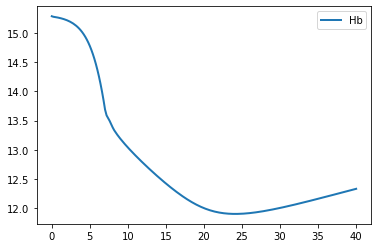

12460.163817392759

In [7]:
OIE = te.loada('OIE_model.ant')
print(OIE.E)
#OIE.M = 0
#OIE.events_medication_on = False
OIE.BH_max = 1
print(OIE.J_R_death + OIE.J_R_aging)
result = OIE.simulate (0, 40, 201, ['time',  'Hb'])


OIE.plot(result)

OIE.oiE

5566629.61993183
64354.923389285905


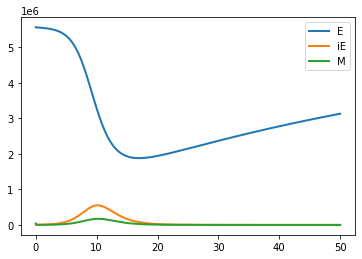

3131404.17294038

In [8]:
#ohne feedback
OIE = te.loada('OIE_model.ant')
print(OIE.E)
#OIE.Hkt = 0.2
OIE.events_medication_on = False
#OIE.M = 400000
print(OIE.J_R_death + OIE.J_R_aging)
result = OIE.simulate (0, 50, 201, ['time',  'E', 'iE', 'M'])
OIE.plot(result)

OIE.E